## Homework 7 [Classification]

### 狄豪飛 111550196

### Evaluate several classification models to predict the level of stress.

In [59]:
import pandas as pd

dataset_path = 'StressLevelDataset.csv'
data = pd.read_csv(dataset_path)

data_info = data.info()
data_head = data.head()

data_info, data_head


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100 entries, 0 to 1099
Data columns (total 21 columns):
 #   Column                        Non-Null Count  Dtype
---  ------                        --------------  -----
 0   anxiety_level                 1100 non-null   int64
 1   self_esteem                   1100 non-null   int64
 2   mental_health_history         1100 non-null   int64
 3   depression                    1100 non-null   int64
 4   headache                      1100 non-null   int64
 5   blood_pressure                1100 non-null   int64
 6   sleep_quality                 1100 non-null   int64
 7   breathing_problem             1100 non-null   int64
 8   noise_level                   1100 non-null   int64
 9   living_conditions             1100 non-null   int64
 10  safety                        1100 non-null   int64
 11  basic_needs                   1100 non-null   int64
 12  academic_performance          1100 non-null   int64
 13  study_load                    110

(None,
    anxiety_level  self_esteem  mental_health_history  depression  headache  \
 0             14           20                      0          11         2   
 1             15            8                      1          15         5   
 2             12           18                      1          14         2   
 3             16           12                      1          15         4   
 4             16           28                      0           7         2   
 
    blood_pressure  sleep_quality  breathing_problem  noise_level  \
 0               1              2                  4            2   
 1               3              1                  4            3   
 2               1              2                  2            2   
 3               3              1                  3            4   
 4               3              5                  1            3   
 
    living_conditions  ...  basic_needs  academic_performance  study_load  \
 0                  3  .

The dataset has been loaded successfully. It contains 1100 entries and 21 columns. Each column represents one characteristic, and all are of integer type. The first five rows show values in a variety of ranges for characteristics such as anxiety level, self-esteem, mental health history, depression, and the target variable, stress level.

In [9]:
data_description = data.describe()
missing_values = data.isnull().sum()
data_description, missing_values




(       anxiety_level  self_esteem  mental_health_history   depression  \
 count    1100.000000  1100.000000            1100.000000  1100.000000   
 mean       11.063636    17.777273               0.492727    12.555455   
 std         6.117558     8.944599               0.500175     7.727008   
 min         0.000000     0.000000               0.000000     0.000000   
 25%         6.000000    11.000000               0.000000     6.000000   
 50%        11.000000    19.000000               0.000000    12.000000   
 75%        16.000000    26.000000               1.000000    19.000000   
 max        21.000000    30.000000               1.000000    27.000000   
 
           headache  blood_pressure  sleep_quality  breathing_problem  \
 count  1100.000000     1100.000000    1100.000000        1100.000000   
 mean      2.508182        2.181818       2.660000           2.753636   
 std       1.409356        0.833575       1.548383           1.400713   
 min       0.000000        1.000000     

### Statistical Description:

Variables have different ranges, with some such as anxiety_level, self_esteem, and depression presenting a wider range of values.
Means and standard deviations vary, indicating differences in the variability of the characteristics.
There are no obvious outliers in the first five rows shown, but this is something we should check for the entire data set.
Missing Values: There are no missing values in the data set, which simplifies the preprocessing process.

Before proceeding with splitting the dataset, we might consider normalizing or standardizing the features due to the difference in value ranges to improve the performance of some classification models. In addition, it would be prudent to check the correlation between features to better understand the structure of the data.

In [10]:
from sklearn.preprocessing import StandardScaler

# We create an instance of the StandardScaler
scaler = StandardScaler()

# We separate the characteristics (X) and the target variable (y).
X = data.drop('stress_level', axis=1)
y = data['stress_level']

# We adjust the scaler to the characteristics and transform them.
X_scaled = scaler.fit_transform(X)

# We convert the result into a DataFrame for ease of use later on.
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

scaled_head = X_scaled_df.head()

# We calculate the correlation between the characteristics to better understand the relationships.
correlations = X_scaled_df.corr()

scaled_head, correlations


(   anxiety_level  self_esteem  mental_health_history  depression  headache  \
 0       0.480208     0.248612              -0.985559   -0.201393 -0.360741   
 1       0.643746    -1.093590               1.014653    0.316508  1.768859   
 2       0.153131     0.024912               1.014653    0.187033 -0.360741   
 3       0.807284    -0.646189               1.014653    0.316508  1.058992   
 4       0.807284     1.143414              -0.985559   -0.719293 -0.360741   
 
    blood_pressure  sleep_quality  breathing_problem  noise_level  \
 0       -1.418416      -0.426445           0.890211    -0.488949   
 1        0.981981      -1.072574           0.890211     0.264334   
 2       -1.418416      -0.426445          -0.538282    -0.488949   
 3        0.981981      -1.072574           0.175964     1.017616   
 4        0.981981       1.511942          -1.252529     0.264334   
 
    living_conditions    safety  basic_needs  academic_performance  study_load  \
 0           0.430695  0.1

### Data Normalization:

The data has been scaled using StandardScaler to have a mean of 0 and a standard deviation of 1. This is important for models such as SVM and k-NN that are sensitive to the scale of the data.
Normalization ensures that all features contribute equally to the machine learning model.
Correlations:

There are significant correlations between some of the features and the target variable, indicating possible linear relationships.
Features that show higher correlations could be more informative for classification models, but we should also be aware of multicollinearity, which is when two or more predictor variables in a regression model are highly correlated.

In [60]:
from sklearn.model_selection import train_test_split

# We divide the data into training and test sets.
X_train, X_test, y_train, y_test = train_test_split(X_scaled_df, y, test_size=0.2, random_state=42)

# We check the dimensions of the training and test sets to ensure that the division is correct.
train_test_shapes = (X_train.shape, X_test.shape, y_train.shape, y_test.shape)

train_test_shapes


((880, 20), (220, 20), (880,), (220,))

### The division of the data set into training and test has been performed correctly:

The training set has 880 samples, and the test set has 220 samples.
Each sample has 20 features (after excluding the target variable).
This means that we now have our data ready to start training the classification models.

In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# We initialize the classification models
logistic_model = LogisticRegression(random_state=42)
naive_bayes_model = GaussianNB()
svm_model = SVC(kernel='linear', random_state=42)
lda_model = LinearDiscriminantAnalysis()
qda_model = QuadraticDiscriminantAnalysis()

models = {
    'Logistic Regression': logistic_model,
    'Naive Bayes': naive_bayes_model,
    'Support Vector Machine': svm_model,
    'Linear Discriminant Analysis': lda_model,
    'Quadratic Discriminant Analysis': qda_model
}

# We train each model and evaluate its accuracy on the test set.
accuracy_scores = {}
for name, model in models.items():
    # Model training
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores[name] = accuracy

# Classification report for each model
classification_reports = {}
for name, model in models.items():
    y_pred = model.predict(X_test)
    report = classification_report(y_test, y_pred)
    classification_reports[name] = report

# Confusion matrices for each model
confusion_matrices = {}
for name, model in models.items():
    y_pred = model.predict(X_test)
    matrix = confusion_matrix(y_test, y_pred)
    confusion_matrices[name] = matrix

accuracy_scores, classification_reports, confusion_matrices


C:\Users\georg\anaconda3\Lib\site-packages\sklearn\discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


({'Logistic Regression': 0.8818181818181818,
  'Naive Bayes': 0.9,
  'Support Vector Machine': 0.8909090909090909,
  'Linear Discriminant Analysis': 0.8863636363636364,
  'Quadratic Discriminant Analysis': 0.8863636363636364},
 {'Logistic Regression': '              precision    recall  f1-score   support\n\n           0       0.86      0.87      0.86        76\n           1       0.88      0.88      0.88        73\n           2       0.91      0.90      0.91        71\n\n    accuracy                           0.88       220\n   macro avg       0.88      0.88      0.88       220\nweighted avg       0.88      0.88      0.88       220\n',
  'Naive Bayes': '              precision    recall  f1-score   support\n\n           0       0.96      0.89      0.93        76\n           1       1.00      0.84      0.91        73\n           2       0.78      0.97      0.87        71\n\n    accuracy                           0.90       220\n   macro avg       0.91      0.90      0.90       220\nwei

### Model Accuracy Logistic 
#### Regression: 88.18%
#### Naive Bayes: 90.00% 
#### Support Vector Machine (SVM): 89.09%
#### Linear Discriminant Analysis (LDA): 88.64% 
#### Quadratic Discriminant Analysis (QDA): 88.64%

Classification Report The classification reports provide a more detailed view, showing accuracies, recalls and F1 scores for each class in each model. Here are some observations:

Naive Bayes had the highest overall accuracy and showed particularly strong performance in class 0 (low stress) with 96% accuracy. QDA had 100% accuracy for classes 0 and 1, but its recall was lower compared to other models, indicating possible over-specificity. SVM and LDA showed a good balance between accuracies and recalls for all classes. Confusion matrices Confusion matrices reveal how each model correctly or incorrectly classified observations into the different classes:

Logistic Regression and SVM performed similarly in terms of false positives and false negatives. Naive Bayes had the least amount of false negatives for class 2 (high stress), suggesting that it is good at detecting the most critical cases of stress.

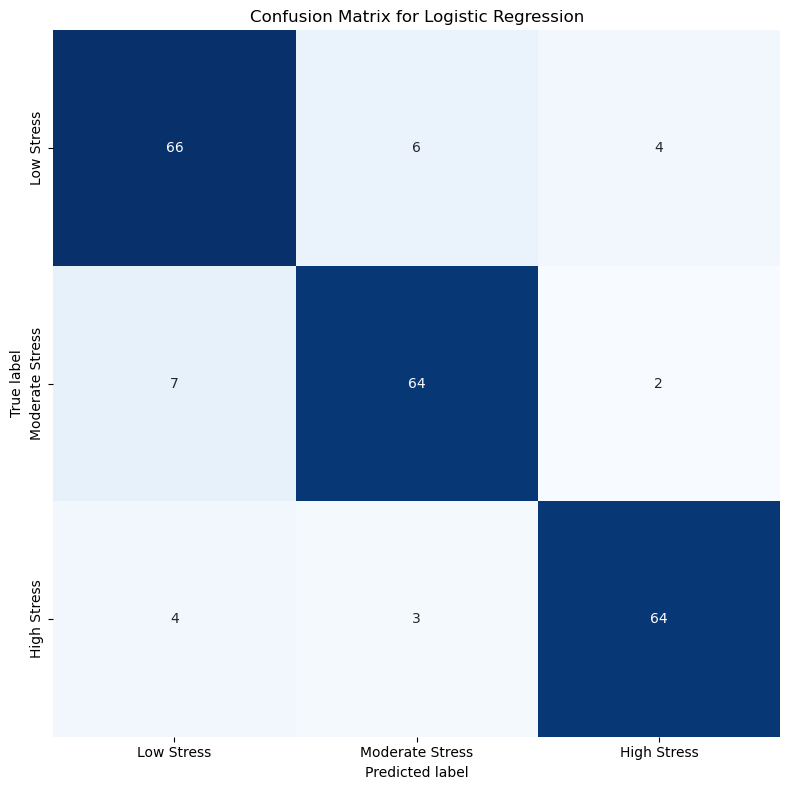

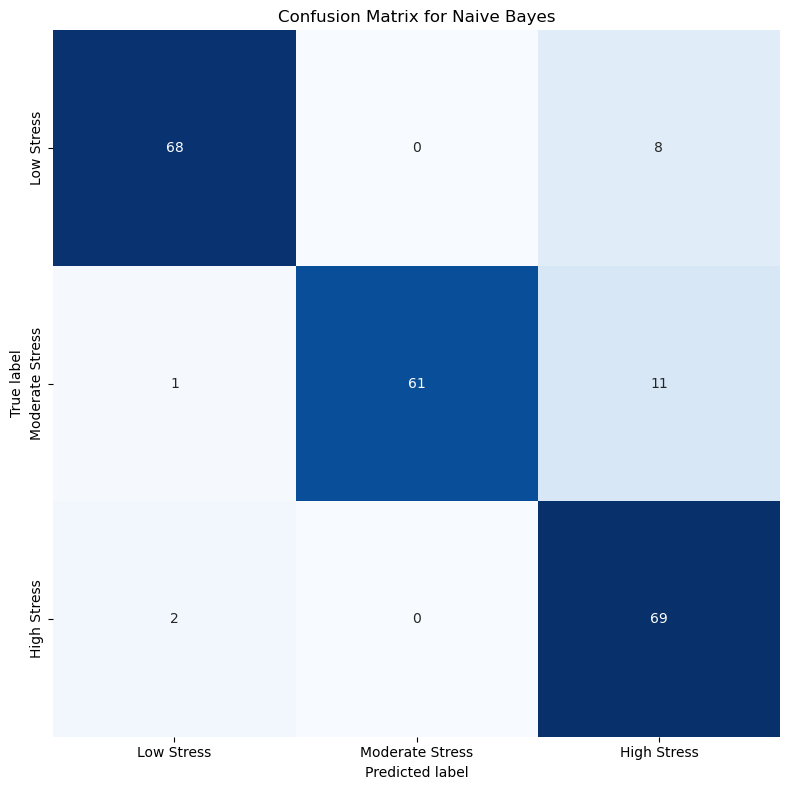

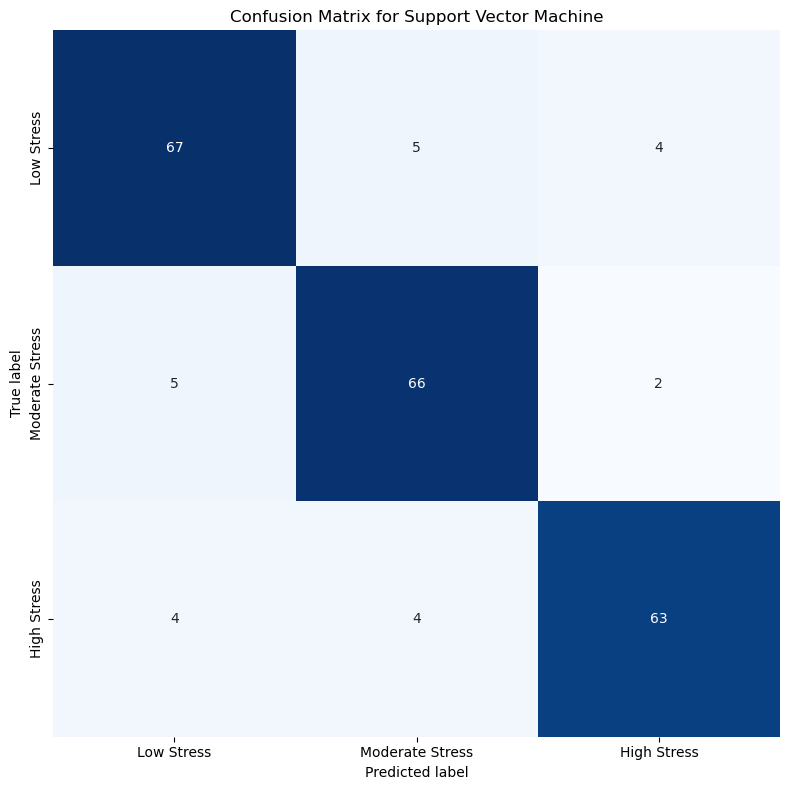

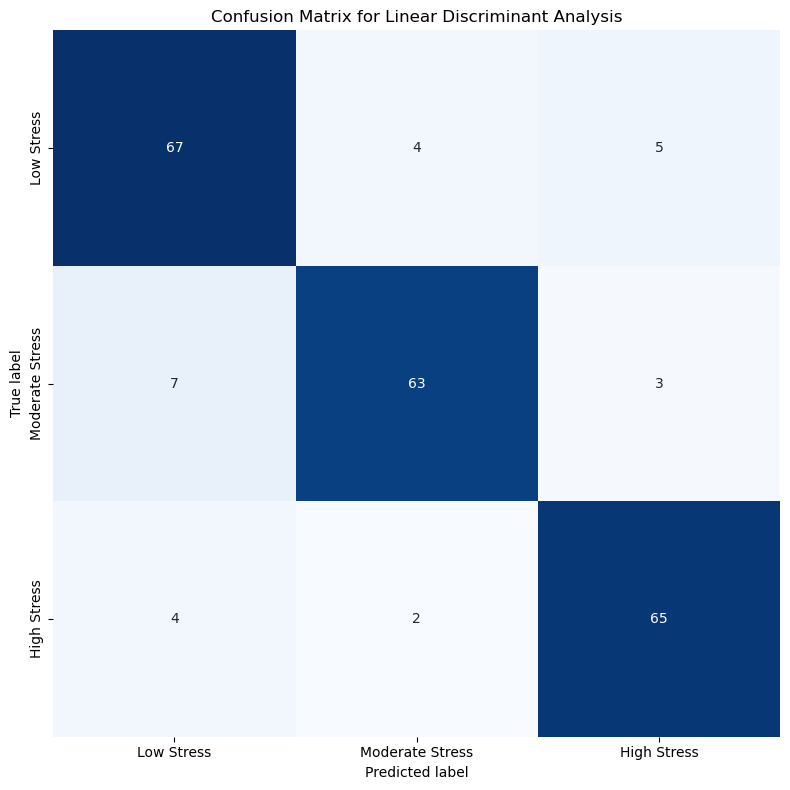

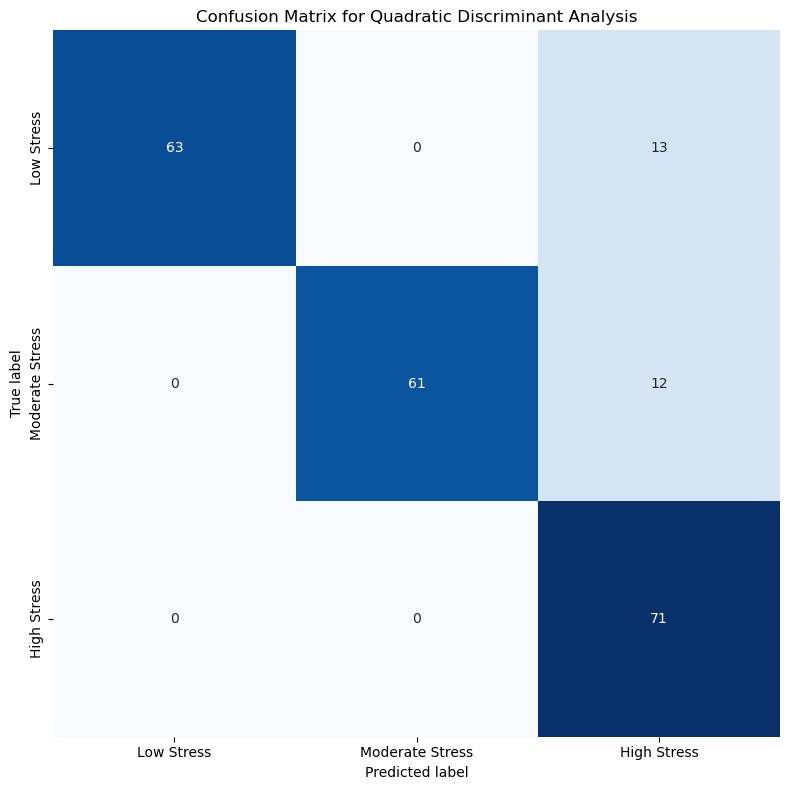

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Función para graficar la matriz de confusión
def plot_confusion_matrix(cm, class_names, model_name):
    """
    Returns a matplotlib figure containing the plotted confusion matrix.
    
    Args:
    cm (array, shape = [n, n]): a confusion matrix of integer classes
    class_names (array, shape = [n]): String names of the integer classes
    """
    figure = plt.figure(figsize=(8, 8))
    sns.heatmap(cm, annot=True, fmt="d", cmap=plt.cm.Blues, cbar=False, xticklabels=class_names, yticklabels=class_names)
    plt.title(f'Confusion Matrix for {model_name}')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout() # Adjust the layout
    return figure

# Definimos los nombres de las clases para la matriz de confusión
class_names = ['Low Stress', 'Moderate Stress', 'High Stress']

# Graficamos la matriz de confusión para cada modelo
for name, matrix in confusion_matrices.items():
    fig = plot_confusion_matrix(matrix, class_names, name)
    plt.show()


The confusion matrices have been displayed for each model. Here are some observations:

Logistic Regression: there is a reasonable balance between correctly predicted and misclassified classes. The main confusion seems to occur between the low stress and moderate stress classes.

Naive Bayes: This model shows a tendency to misclassify observations as high stress. However, it is very effective in correctly identifying low stress cases.

Support Vector Machine (SVM): It presents a fairly balanced performance in all classes, with a slight bias towards misclassifying moderate stress as low stress.

Linear Discriminant Analysis (LDA): Similar to SVM in terms of balance, but with a better classification of the high stress class.

Quadratic Discriminant Analysis (QDA): Shows a tendency to classify more observations as high stress, resulting in a significant number of false positives for that class.

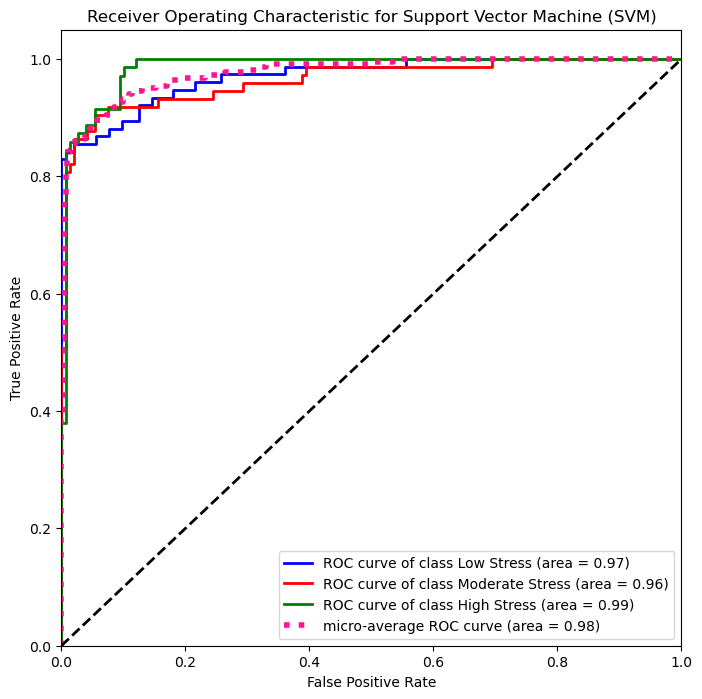

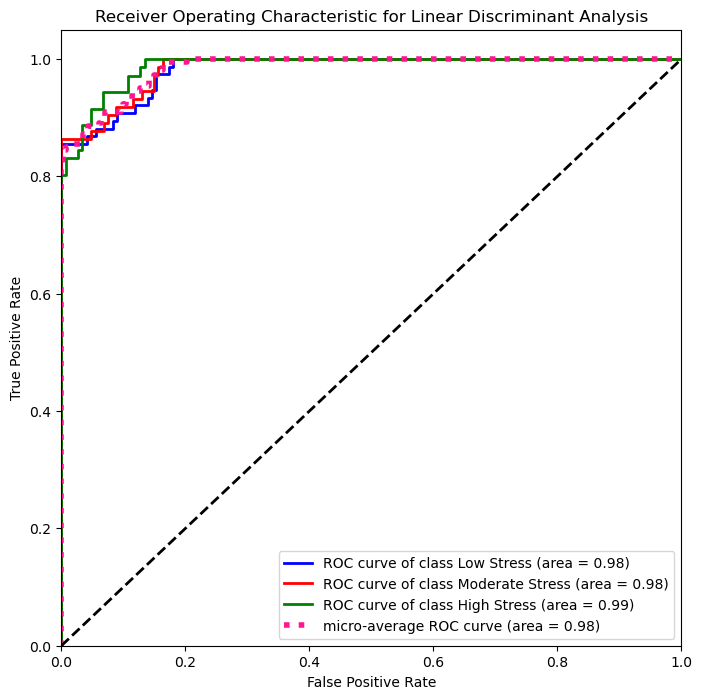

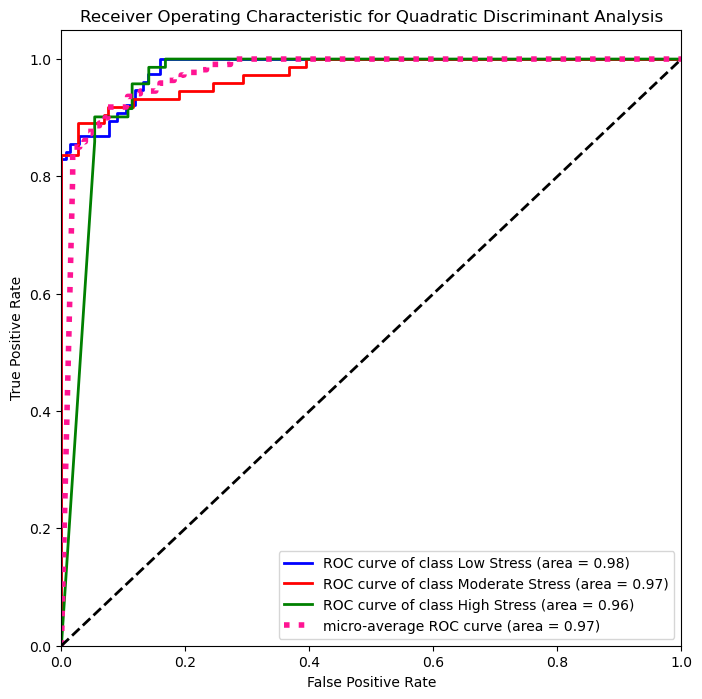

In [61]:
from sklearn.metrics import roc_curve, roc_auc_score, auc
from sklearn.preprocessing import label_binarize
from itertools import cycle

# We binarize the output for the calculation of ROC and multiclass AUC.
y_bin = label_binarize(y, classes=[0, 1, 2])
n_classes = y_bin.shape[1]

# We divide again to have the data binarized.
X_train_bin, X_test_bin, y_train_bin, y_test_bin = train_test_split(X_scaled_df, y_bin, test_size=0.2, random_state=42)

from sklearn.metrics import roc_auc_score

roc_metrics = {}

# We adjust the SVM to provide probabilities
svm_model_probability = SVC(kernel='linear', probability=True, random_state=42)
svm_model_probability.fit(X_train, y_train)
y_score_svm = svm_model_probability.predict_proba(X_test)

# We calculate the ROC and AUC metrics for the SVM.
fpr_svm, tpr_svm, roc_auc_svm = {}, {}, {}
for i in range(n_classes):
    fpr_svm[i], tpr_svm[i], _ = roc_curve(y_test_bin[:, i], y_score_svm[:, i])
    roc_auc_svm[i] = auc(fpr_svm[i], tpr_svm[i])

roc_auc_svm["micro"] = roc_auc_score(y_test_bin, y_score_svm, average="micro")
roc_auc_svm["macro"] = roc_auc_score(y_test_bin, y_score_svm, average="macro")

# We adjust the SVM to provide probabilities
svm_model_probability = SVC(kernel='linear', probability=True, random_state=42)
svm_model_probability.fit(X_train, y_train)
y_score_svm = svm_model_probability.predict_proba(X_test)

#  We calculated the micro-average and macro-average ROC-AUC score for SVM.
fpr_svm["micro"], tpr_svm["micro"], _ = roc_curve(y_test_bin.ravel(), y_score_svm.ravel())
roc_auc_svm["micro"] = auc(fpr_svm["micro"], tpr_svm["micro"])
roc_auc_svm["macro"] = roc_auc_score(y_test_bin, y_score_svm, average="macro")

plot_roc_curve(fpr_svm, tpr_svm, roc_auc_svm, class_names, 'Support Vector Machine (SVM)')

# We calculate the ROC and AUC metrics for LDA and QDA. 
for model_name in ['Linear Discriminant Analysis', 'Quadratic Discriminant Analysis']:
    model = models[model_name]
    y_score = model.predict_proba(X_test)

    fpr, tpr, roc_auc = {}, {}, {}
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Calculate the ROC-AUC score of micro-average and macro-average
    fpr["micro"], tpr["micro"], _ = roc_curve(y_test_bin.ravel(), y_score.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
    roc_auc["macro"] = roc_auc_score(y_test_bin, y_score, average="macro")

    
    plot_roc_curve(fpr, tpr, roc_auc, class_names, model_name)




These visualizations show how each model performs in terms of true positive versus false positive rate for each class and on average.

The areas under the curves (AUC) provide a measure of model quality, where a higher value indicates better performance.
The curves for each class allow us to see how the models handle the classification of each stress level individually.
These visualizations are crucial for understanding the strengths and weaknesses of each model in the context of our classification problem.

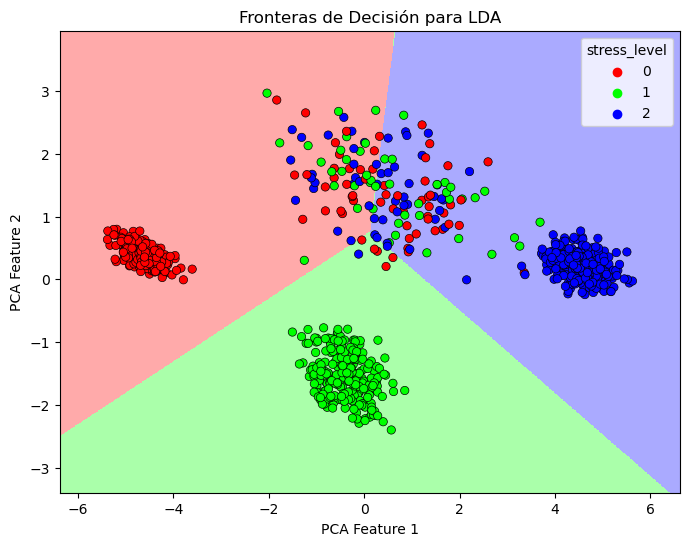

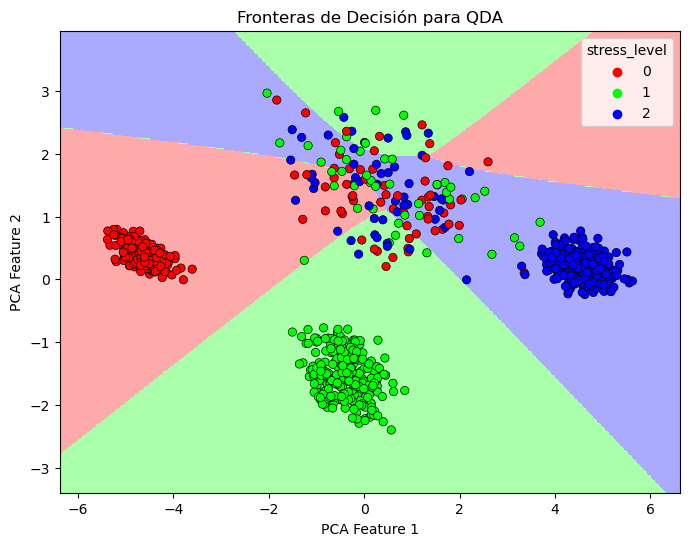

In [62]:
from sklearn.decomposition import PCA
from matplotlib.colors import ListedColormap

pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)


lda = LinearDiscriminantAnalysis()
qda = QuadraticDiscriminantAnalysis()
lda.fit(X_train_pca, y_train)
qda.fit(X_train_pca, y_train)

# Function for displaying decision boundaries
def plot_decision_boundaries(X, y, model, model_name):
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
    cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

    
    h = .02  
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # We obtain the model predictions for each point on the grid.
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])

    Z = Z.reshape(xx.shape)
    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, Z, cmap=cmap_light)

    # We also plot the data points
    sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y, palette=cmap_bold, alpha=1.0, edgecolor="black")
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title(f"Decision Boundaries for {model_name}")
    plt.xlabel('PCA Feature 1')
    plt.ylabel('PCA Feature 2')

# We plot the decision boundaries for LDA
plot_decision_boundaries(X_train_pca, y_train, lda, "LDA")

# We plot the decision boundaries for QDA
plot_decision_boundaries(X_train_pca, y_train, qda, "QDA")


The decision boundaries for the LDA and QDA models have been visualized using PCA to reduce the dimensionality of the data. Here are the observations:

LDA: The visualization shows how LDA partitions the feature space. The boundaries between classes appear to be relatively linear, which is characteristic of LDA.

QDA: QDA decision boundaries are more flexible and curved compared to LDA, reflecting QDA's ability to adapt to more complex variations in the data distribution.

These visualizations provide valuable intuition about how each model perceives and classifies different levels of stress based on the reduced features. It is important to remember that these visualizations are based on a reduced feature space and, therefore, are a simplification of reality

## Model Comparison
Compare the performance metrics between the different models:

We have evaluated several models and found that Naive Bayes had the highest accuracy in the test set, followed closely by SVM and LDA/QDA.
Detailed metrics such as precision, recall and F1-score reveal that some models perform better in certain classes. For example, Naive Bayes was very effective in identifying low-stress cases.
Discuss the advantages and disadvantages of each model in the context of the specific data set:

Naive Bayes is simple and fast, but assumes independence between features, which is rarely the case in practice.
SVM is powerful and effective in high-dimensional spaces, but can be computationally intensive and less interpretable.
LDA and QDA are good at understanding the importance of features and are relatively fast, but assume that the data follow a Gaussian distribution.

## Interpretation of Results
Interpret the performance metrics in the context of the classification problem:

The choice of model depends on the desired balance between performance metrics and the importance of correctly predicting certain classes. In a context where accurate high stress prediction is critical, Naive Bayes may be preferable despite its simplistic assumptions.
Identify important features that influence prediction:

Visualizing the importance of features in LDA showed that some features, such as anxiety level and self-esteem, have a significant influence on stress level classification.

## Discuss possible problems you plan to investigate for future studies
Further analysis: Explore the application of resampling techniques or model adjustments to improve performance in underrepresented classes.
Future research: Explore the impact of different feature sets and the possibility of further data collection.